In [16]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from subprocess import Popen, PIPE
import pickle

In [2]:
def create_test_case_big_cycle(n):
    assert n <= 1000
    res = np.array([[0.25]*n]*n)
    for i in range(n):
        res[i, i] = 1
        res[i, (i+1)%n] = 1.001
    return str(n) + '\n'+'\n'.join(' '.join(map(str, l)) for l in res) + '\n'

In [32]:
def create_test_case_cycle(n, sz):
    assert n <= 1000
    res = np.array([[0.25]*n]*n)
    for i in range(n):
        res[i, i] = 1
    cycle = random.sample(range(n), sz)
    for i, j in zip(cycle, cycle[1:]+cycle[:1]):
        res[i, j] = 1.001
    return str(n) + '\n'+'\n'.join(' '.join(map(str, l)) for l in res) + '\n'

In [33]:
test = create_test_case_cycle(5, 4)
print(test)

5
1.0 1.001 0.25 0.25 0.25
0.25 1.0 0.25 0.25 1.001
0.25 0.25 1.0 0.25 0.25
1.001 0.25 0.25 1.0 0.25
0.25 0.25 0.25 1.001 1.0



In [34]:
base_dir = os.path.join(get_ipython().starting_dir, '..', '..')

In [44]:
exec_file = [os.path.join(base_dir, 'arbitraje_time'), 'FloydWarshall']

In [45]:
results = {}
results_arr = []
for n in range(25, 1000, 25):
    results[n] = []
    for i in range(20):
        sz = i * n//20
        print('\rn:', n, 'sz:', sz, ' '*10, end='')
        with Popen(exec_file, stdin=PIPE, stdout=PIPE) as proc:
            proc.stdin.write(create_test_case_cycle(n, sz).encode('UTF-8'))
            proc.stdin.flush()
            ticks = int(proc.stdout.read().decode('UTF-8')) 
            results[n].append(ticks)
            results_arr.append([n, ticks])

n: 975 sz: 926           

In [46]:
with open(os.path.join(base_dir, 'FloydWarshall_cycle.pickle'), 'wb') as f:
    pickle.dump(results_arr, f)

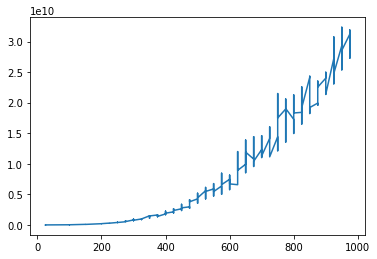

In [43]:
plt.plot(*zip(*results_arr))